# Problem Statement: Loan Approval Prediction Problem
Type: Binary Classification
Loan approval prediction is classic problem to learn and apply lots of data analysis techniques to 
create best Classification model.

Given with the dataset consisting of details of applicants for loan and status whether the loan application is approved or not.
Basis on the a binary classification model is to be created with maximum accuracy.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from scipy import stats


In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling Null Values

<Axes: >

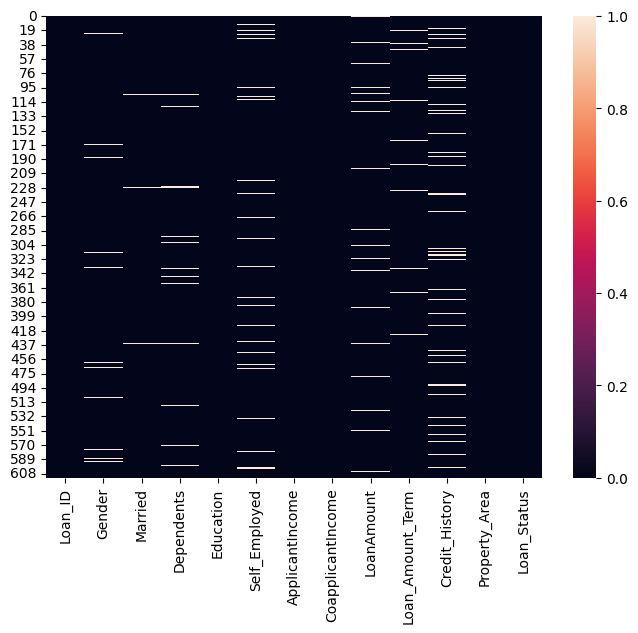

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

## Filling null values with mode for categorical columns

In [6]:
for column in ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[column].fillna(df[column].mode()[0], inplace=True)

## Filling null values with median for numerical column

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(np.nanmedian(df['LoanAmount']))

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Graphs

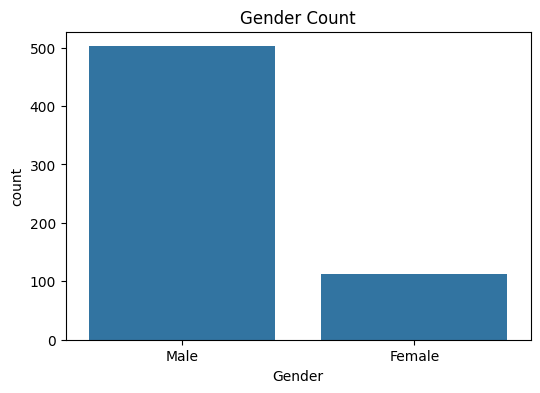

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Gender')
plt.title("Gender Count")
plt.show()

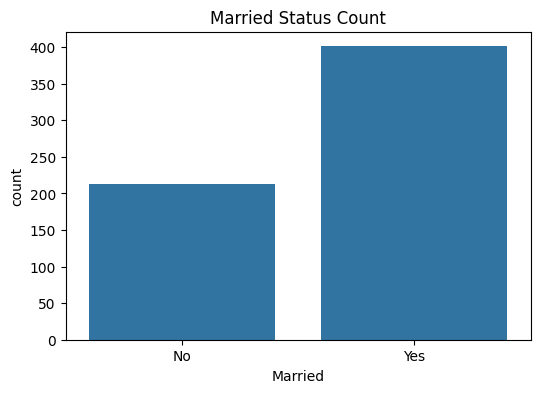

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Married')
plt.title("Married Status Count")
plt.show()

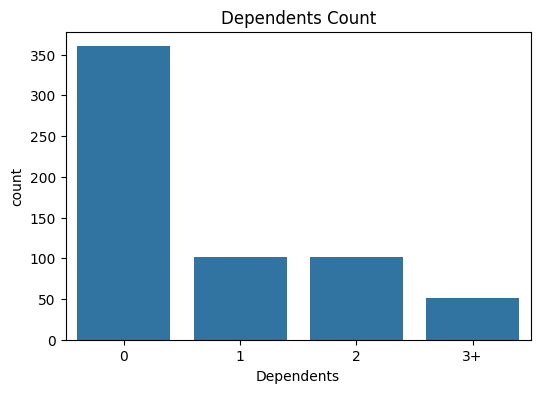

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Dependents')
plt.title("Dependents Count")
plt.show()

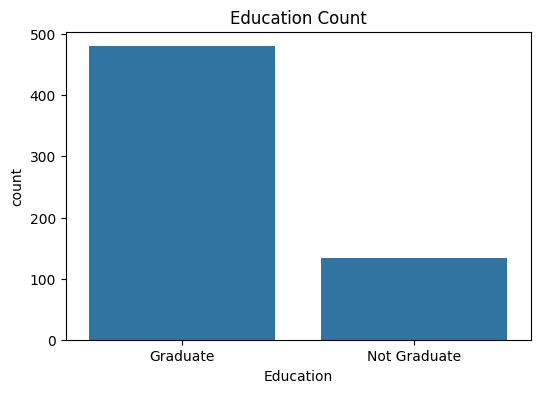

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Education')
plt.title("Education Count")
plt.show()

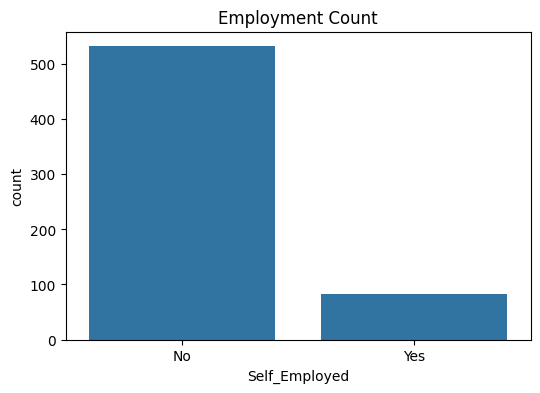

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Self_Employed')
plt.title("Employment Count")
plt.show()

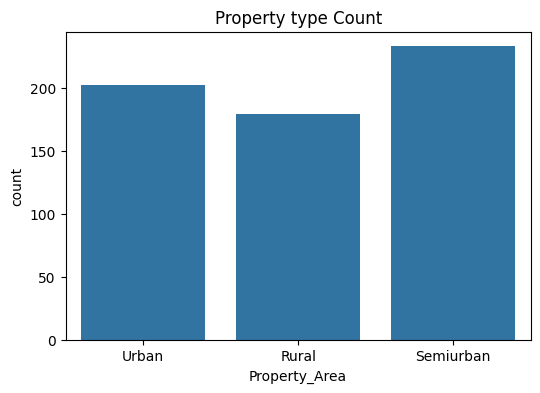

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x = 'Property_Area')
plt.title("Property type Count")
plt.show()

# Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
for column in ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

In [17]:
encoder = LabelEncoder()
df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

In [18]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,Urban,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1,Urban,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1,Urban,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0,Semiurban,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1,Urban,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1,Semiurban,0


## One Hot Encoding

In [19]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [20]:
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

In [21]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [22]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,1,False,False,True
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,True,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,1,False,False,True
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,1,False,False,True
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,1,False,False,True
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1,1,False,False,True
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1,1,False,False,True
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0,0,False,True,False
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1,1,False,False,True
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1,0,False,True,False


# Train Test Split

In [23]:
x = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

## Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtraintrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Model Building

We will be applying the following algorithms to the dataset:

[1] Logistic Regression

[2] Support Vector Machines (SVM)

[3] Decision Tree

Defining a function so that we can use the code again for different algorithms

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score


In [27]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    cs = classification_report(ytest,ypred)
    
    print(cs)
    print("Accuracy of ",model, ":",ac)
    
    return model

In [36]:
logreg = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [94]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        43
           1       0.67      1.00      0.80        80

    accuracy                           0.68       123
   macro avg       0.84      0.55      0.49       123
weighted avg       0.79      0.68      0.58       123

Accuracy of  LogisticRegression() : 0.6829268292682927


LogisticRegression()

In [95]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

Accuracy of  SVC() : 0.6504065040650406


SVC()

In [96]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.23      0.30      0.26        43
           1       0.55      0.46      0.50        80

    accuracy                           0.41       123
   macro avg       0.39      0.38      0.38       123
weighted avg       0.44      0.41      0.42       123

Accuracy of  DecisionTreeClassifier() : 0.4065040650406504


DecisionTreeClassifier()

In [97]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        43
           1       0.00      0.00      0.00        80

    accuracy                           0.35       123
   macro avg       0.17      0.50      0.26       123
weighted avg       0.12      0.35      0.18       123

Accuracy of  KNeighborsClassifier() : 0.34959349593495936


KNeighborsClassifier()

# Hyper Parameter Testing (HPT)

# Logistic Regression -- Solver

In [98]:
# now we use saga solver to check if it increased accu or not
logreg = LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [99]:
ac = accuracy_score(ytest,ypred)
cs = classification_report(ytest,ypred)
print(cs)
print(f'Accuracy : {ac}')


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

Accuracy : 0.6504065040650406


In [100]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [101]:
ac = accuracy_score(ytest,ypred)
cs = classification_report(ytest,ypred)
print(cs)
print(f'Accuracy : {ac}')


              precision    recall  f1-score   support

           0       1.00      0.28      0.44        43
           1       0.72      1.00      0.84        80

    accuracy                           0.75       123
   macro avg       0.86      0.64      0.64       123
weighted avg       0.82      0.75      0.70       123

Accuracy : 0.7479674796747967


In [103]:
logreg = LogisticRegression(solver='sag')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

ac = accuracy_score(ytest,ypred)
cs = classification_report(ytest,ypred)
print(cs)
print(f'Accuracy : {ac}')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

Accuracy : 0.6504065040650406


In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [106]:
logreg = LogisticRegression(solver='saga')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

ac = accuracy_score(ytest,ypred)
cs = classification_report(ytest,ypred)
print(cs)
print(f'Accuracy : {ac}')

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy : 0.7886178861788617


In [107]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

ac = accuracy_score(ytest,ypred)
cs = classification_report(ytest,ypred)
print(cs)
print(f'Accuracy : {ac}')

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy : 0.7886178861788617


#### Logistic Regression (wihtout HPT and Scaling)

#### Accuracy : 68

#### Logistic Regression (with HPT and Scaling)

#### Accuaracy: 78 (solver = liblinear)

# SVM (kernel)

In [109]:
# as accuaracy is low when we try svm so we will hyper tune it
# kernel is the attribute we used to hpt it
svm = SVC(kernel="linear")
mymodel(svm)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy of  SVC(kernel='linear') : 0.7886178861788617


SVC(kernel='linear')

In [110]:
svm = SVC(kernel = 'poly')
mymodel(svm)

              precision    recall  f1-score   support

           0       0.48      0.67      0.56        43
           1       0.78      0.61      0.69        80

    accuracy                           0.63       123
   macro avg       0.63      0.64      0.62       123
weighted avg       0.67      0.63      0.64       123

Accuracy of  SVC(kernel='poly') : 0.6341463414634146


SVC(kernel='poly')

In [112]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("scalar",StandardScaler()),("svm",SVC())])

In [113]:
pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)

In [114]:
mymodel(pipe)


              precision    recall  f1-score   support

           0       0.94      0.35      0.51        43
           1       0.74      0.99      0.84        80

    accuracy                           0.76       123
   macro avg       0.84      0.67      0.68       123
weighted avg       0.81      0.76      0.73       123

Accuracy of  Pipeline(steps=[('scalar', StandardScaler()), ('svm', SVC())]) : 0.7642276422764228


Pipeline(steps=[('scalar', StandardScaler()), ('svm', SVC())])

In [115]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.48      0.67      0.56        43
           1       0.78      0.61      0.69        80

    accuracy                           0.63       123
   macro avg       0.63      0.64      0.62       123
weighted avg       0.67      0.63      0.64       123

Accuracy of  SVC(kernel='poly') : 0.6341463414634146


SVC(kernel='poly')

### SVM (without HPT and scaling)

### Accuracy : 65

### SVM (with HPT and Scaling)

### Accuracy : 78 (kernel = 'linear)



# Decision Tree (max_depth, min_samples_split, min_samples_leaf)

In [122]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.23      0.33      0.27        43
           1       0.54      0.42      0.48        80

    accuracy                           0.39       123
   macro avg       0.39      0.38      0.37       123
weighted avg       0.43      0.39      0.40       123

Accuracy of  DecisionTreeClassifier() : 0.3902439024390244


DecisionTreeClassifier()

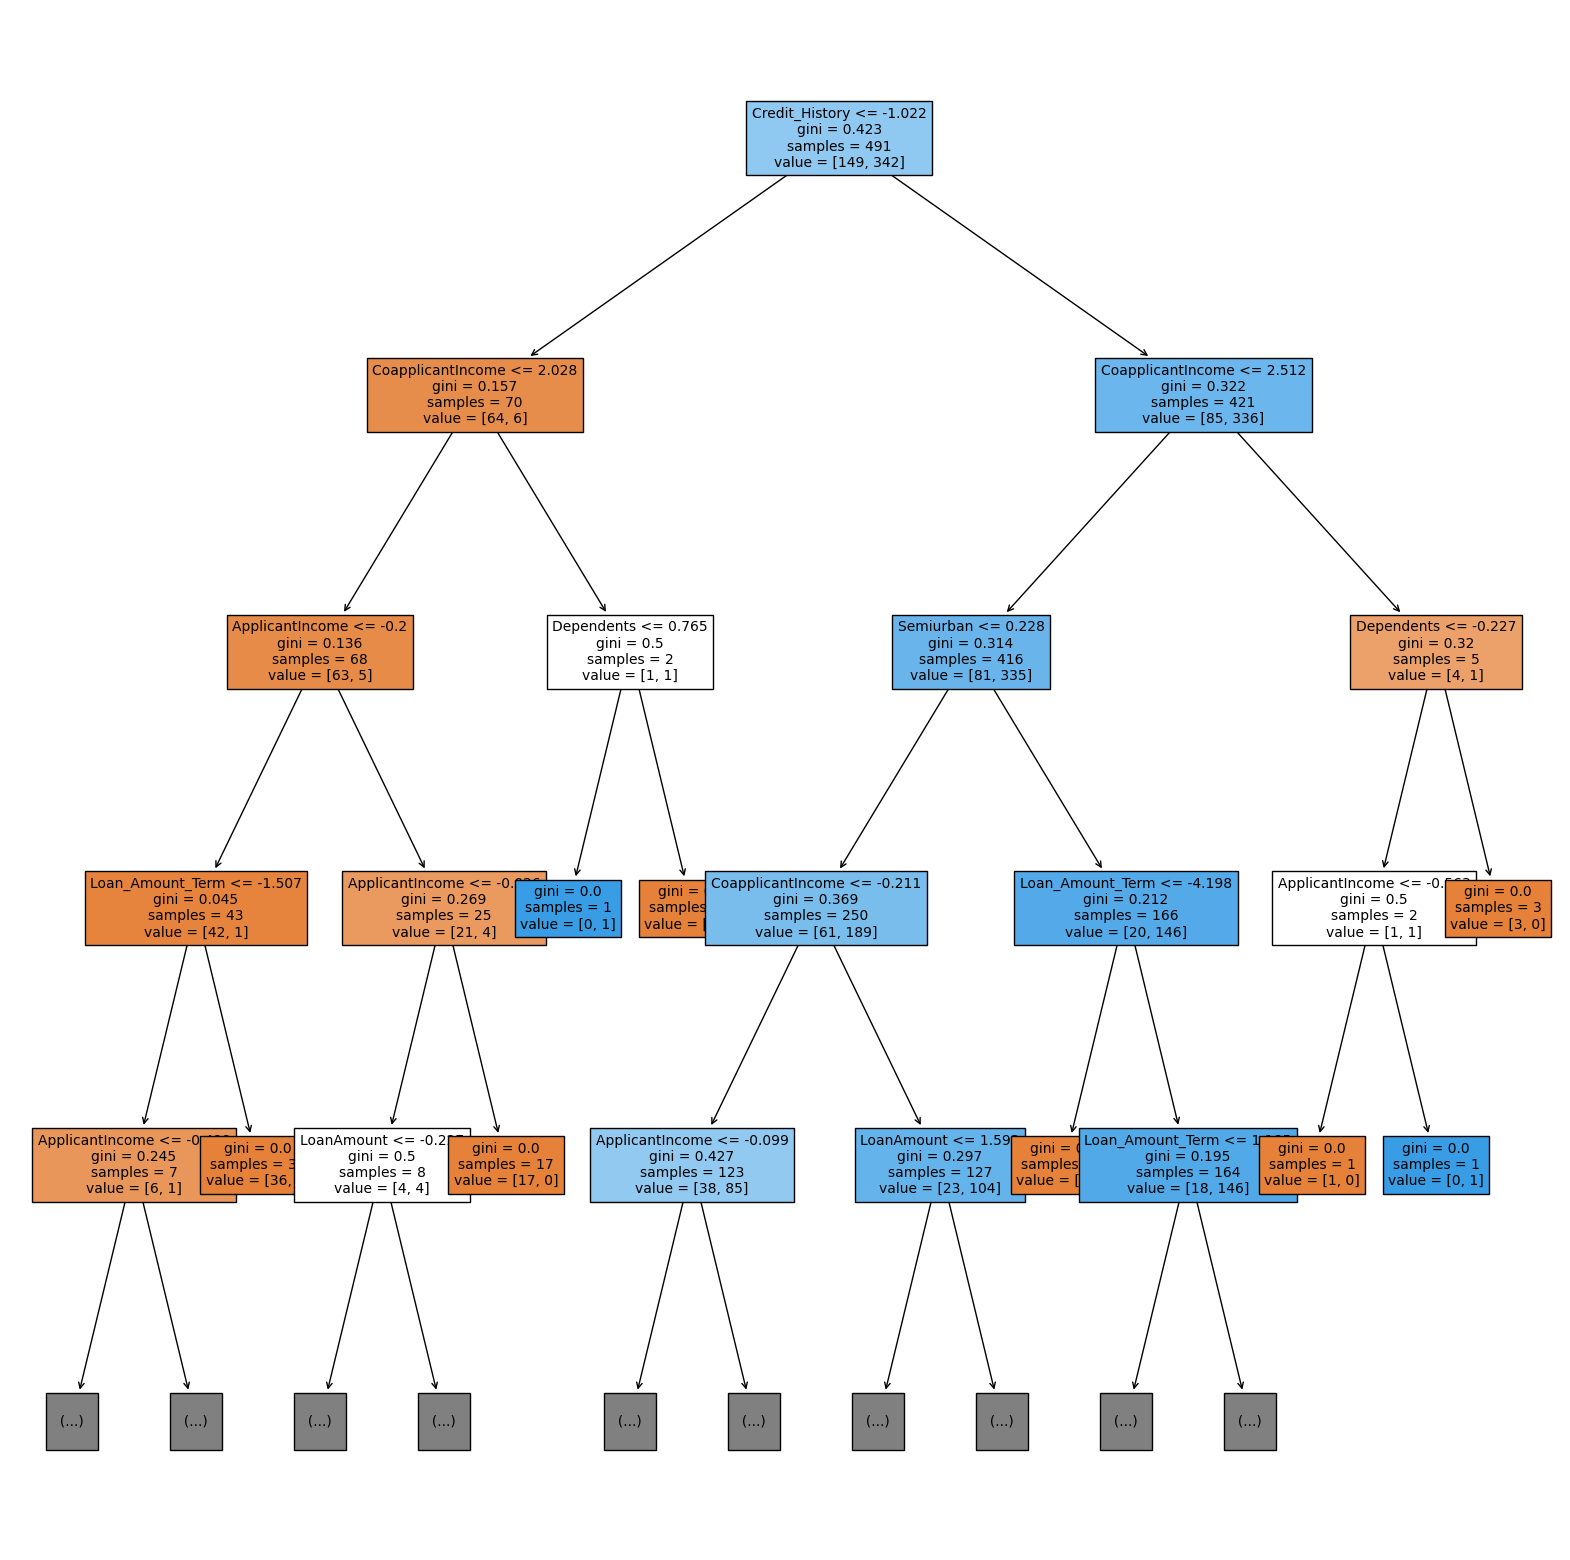

In [124]:
from sklearn import tree

fig,ax = plt.subplots(figsize = (20,20))
chart = tree.plot_tree(dt,max_depth=4,feature_names=x.columns,filled=True,fontsize=10)

In [125]:
for i in range(1,30):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    ypred = dt1.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    print(f'max_depth = {i} accuracy_score = {ac}')

max_depth = 1 accuracy_score = 0.7886178861788617
max_depth = 2 accuracy_score = 0.7886178861788617
max_depth = 3 accuracy_score = 0.7886178861788617
max_depth = 4 accuracy_score = 0.6178861788617886
max_depth = 5 accuracy_score = 0.4796747967479675
max_depth = 6 accuracy_score = 0.4796747967479675
max_depth = 7 accuracy_score = 0.21138211382113822
max_depth = 8 accuracy_score = 0.37398373983739835
max_depth = 9 accuracy_score = 0.37398373983739835
max_depth = 10 accuracy_score = 0.37398373983739835
max_depth = 11 accuracy_score = 0.3902439024390244
max_depth = 12 accuracy_score = 0.37398373983739835
max_depth = 13 accuracy_score = 0.3902439024390244
max_depth = 14 accuracy_score = 0.37398373983739835
max_depth = 15 accuracy_score = 0.4065040650406504
max_depth = 16 accuracy_score = 0.4065040650406504
max_depth = 17 accuracy_score = 0.3902439024390244
max_depth = 18 accuracy_score = 0.3902439024390244
max_depth = 19 accuracy_score = 0.4634146341463415
max_depth = 20 accuracy_score = 0.

In [132]:
dt2 = DecisionTreeClassifier(max_depth=3)
mymodel(dt2)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy of  DecisionTreeClassifier(max_depth=3) : 0.7886178861788617


DecisionTreeClassifier(max_depth=3)

In [133]:
print(dt2.score(xtrain,ytrain))
print(dt2.score(xtest,ytest))

0.8228105906313645
0.7886178861788617


In [144]:
for i in range(200,250):
    dt3 = DecisionTreeClassifier(min_samples_split=i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    
    
    ac = accuracy_score(ytest,ypred)
    print(f'min_samples_split = {i} accuracy_score = {ac}')
    

min_samples_split = 200 accuracy_score = 0.7886178861788617
min_samples_split = 201 accuracy_score = 0.7886178861788617
min_samples_split = 202 accuracy_score = 0.7886178861788617
min_samples_split = 203 accuracy_score = 0.7886178861788617
min_samples_split = 204 accuracy_score = 0.7886178861788617
min_samples_split = 205 accuracy_score = 0.7886178861788617
min_samples_split = 206 accuracy_score = 0.7886178861788617
min_samples_split = 207 accuracy_score = 0.7886178861788617
min_samples_split = 208 accuracy_score = 0.7886178861788617
min_samples_split = 209 accuracy_score = 0.7886178861788617
min_samples_split = 210 accuracy_score = 0.7886178861788617
min_samples_split = 211 accuracy_score = 0.7886178861788617
min_samples_split = 212 accuracy_score = 0.7886178861788617
min_samples_split = 213 accuracy_score = 0.7886178861788617
min_samples_split = 214 accuracy_score = 0.7886178861788617
min_samples_split = 215 accuracy_score = 0.7886178861788617
min_samples_split = 216 accuracy_score =

In [143]:
dt4 = DecisionTreeClassifier(min_samples_split=250)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy of  DecisionTreeClassifier(min_samples_split=250) : 0.7886178861788617


DecisionTreeClassifier(min_samples_split=250)

In [145]:
print(dt4.score(xtrain,ytrain))
print(dt4.score(xtest,ytest))

0.8207739307535642
0.7886178861788617


In [148]:
for i in range(2,80):
    dt5 = DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    
    
    ac = accuracy_score(ytest,ypred)
    print(f'min_samples_leaf = {i} accuracy_score = {ac}')
    

min_samples_leaf = 2 accuracy_score = 0.5121951219512195
min_samples_leaf = 3 accuracy_score = 0.5121951219512195
min_samples_leaf = 4 accuracy_score = 0.5121951219512195
min_samples_leaf = 5 accuracy_score = 0.5121951219512195
min_samples_leaf = 6 accuracy_score = 0.43902439024390244
min_samples_leaf = 7 accuracy_score = 0.5203252032520326
min_samples_leaf = 8 accuracy_score = 0.6991869918699187
min_samples_leaf = 9 accuracy_score = 0.6991869918699187
min_samples_leaf = 10 accuracy_score = 0.5203252032520326
min_samples_leaf = 11 accuracy_score = 0.6260162601626016
min_samples_leaf = 12 accuracy_score = 0.5203252032520326
min_samples_leaf = 13 accuracy_score = 0.5203252032520326
min_samples_leaf = 14 accuracy_score = 0.5203252032520326
min_samples_leaf = 15 accuracy_score = 0.6097560975609756
min_samples_leaf = 16 accuracy_score = 0.6097560975609756
min_samples_leaf = 17 accuracy_score = 0.6097560975609756
min_samples_leaf = 18 accuracy_score = 0.6097560975609756
min_samples_leaf = 19

In [152]:
dt6 = DecisionTreeClassifier(min_samples_leaf=56)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy of  DecisionTreeClassifier(min_samples_leaf=56) : 0.7886178861788617


DecisionTreeClassifier(min_samples_leaf=56)

In [153]:
print(dt4.score(xtrain,ytrain))
print(dt4.score(xtest,ytest))

0.8207739307535642
0.7886178861788617


## Decision Tree (without HPT)

## Accuracy : 41

## Decision Tree (with HPT)

## Accuracy : 79 [Highest] (max_depth = 3, min_samples_split = 250, min_samples_leaf = 56)

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [30]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.52      0.70      0.59        43
           1       0.80      0.65      0.72        80

    accuracy                           0.67       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.70      0.67      0.67       123

Accuracy of  RandomForestClassifier() : 0.6666666666666666


RandomForestClassifier()

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [32]:
ada = AdaBoostClassifier()
mymodel(ada)

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        43
           1       0.74      1.00      0.85        80

    accuracy                           0.77       123
   macro avg       0.87      0.67      0.68       123
weighted avg       0.83      0.77      0.73       123

Accuracy of  AdaBoostClassifier() : 0.7723577235772358


AdaBoostClassifier()

In [48]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())


In [49]:
mymodel(bg)

              precision    recall  f1-score   support

           0       1.00      0.14      0.24        43
           1       0.68      1.00      0.81        80

    accuracy                           0.70       123
   macro avg       0.84      0.57      0.53       123
weighted avg       0.79      0.70      0.61       123

Accuracy of  BaggingClassifier(estimator=LogisticRegression()) : 0.6991869918699187


BaggingClassifier(estimator=LogisticRegression())

#### Logistic Regression (wihtout HPT and Scaling)
#### Accuracy : 68
#### Logistic Regression (with HPT and Scaling)
#### Accuracy: 78 (solver = liblinear)

### SVM (without HPT and scaling)

### Accuracy : 65

### SVM (with HPT and Scaling)

### Accuracy : 78 (kernel = 'linear)



#### Decision Tree (without HPT)

#### Accuracy : 41

#### Decision Tree (with HPT)

#### Accuracy : 79 [Highest] (max_depth = 3, min_samples_split = 250, min_samples_leaf = 56)

#### Adaboost Classifier Accuracy: 77

#### VoTing Classifier Accuracy : 70

## Based on the above accuracy scores we should preferably go ahead with Decision Tree or SVM